# Try mushroom classification dataset
- Still: overfitting very hard to achieve

In [21]:
import os
import sys
import numpy as np
import pandas as pd
#import tensorflow_datasets as tfds
import tensorflow as tf
from matplotlib import pyplot as plt

In [4]:
path_root = os.path.dirname(os.getcwd())
path_data = os.path.join(path_root, "data")
filename_data = os.path.join(path_data, "mushrooms_from_kaggle.csv")

In [5]:
data = pd.read_csv(filename_data)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
data_1hot = pd.get_dummies(data, drop_first=True)
data_1hot.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
X = data_1hot.values[:, 1:]  # data
Y = data_1hot.values[:, 0] # labels

X.shape, Y.shape

((8124, 95), (8124,))

## Splitting the data into training, validation, and test set

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=0)

print(f"Data split into training ({X_train.shape[0]})," \
      f" validation ({X_val.shape[0]}) and test set ({X_test.shape[0]}).") 

Data split into training (6499), validation (812) and test set (813)


## Build neural network

In [9]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [34]:
n_features = X.shape[1]
n_classes = 1

# Input layer
layers_input = Input(shape=(n_features,), name='input')

# Dense layers
layers_dense = Dense(32, 'relu')(layers_input)
layers_dense = Dense(16, 'relu')(layers_dense)

# Output layer
layers_output = Dense(n_classes, 'sigmoid')(layers_dense)


# Defining the model and compiling it
model = Model(inputs=layers_input, outputs=layers_output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 95)]              0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                3072      
_________________________________________________________________
dense_16 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 3,617
Trainable params: 3,617
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(X_train, Y_train,
                    batch_size = 50,
                    epochs = 10,
                    validation_data=(X_val, Y_val), verbose = 1)

Epoch 1/10
130/130 [==============================] - 0s 3ms/step - loss: 0.2654 - accuracy: 0.9171 - val_loss: 0.0570 - val_accuracy: 0.9852
Epoch 2/10
130/130 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9946 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 3/10
130/130 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.9997 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 4/10
130/130 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.9998 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 5/10
130/130 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 9.7060e-04 - val_accuracy: 1.0000
Epoch 6/10
130/130 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 6.4407e-04 - val_accuracy: 1.0000
Epoch 7/10
130/130 [==============================] - 0s 2ms/step - loss: 6.5596e-04 - accuracy: 1.0000 - val_loss: 4.1760e-04 - val_accurac

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

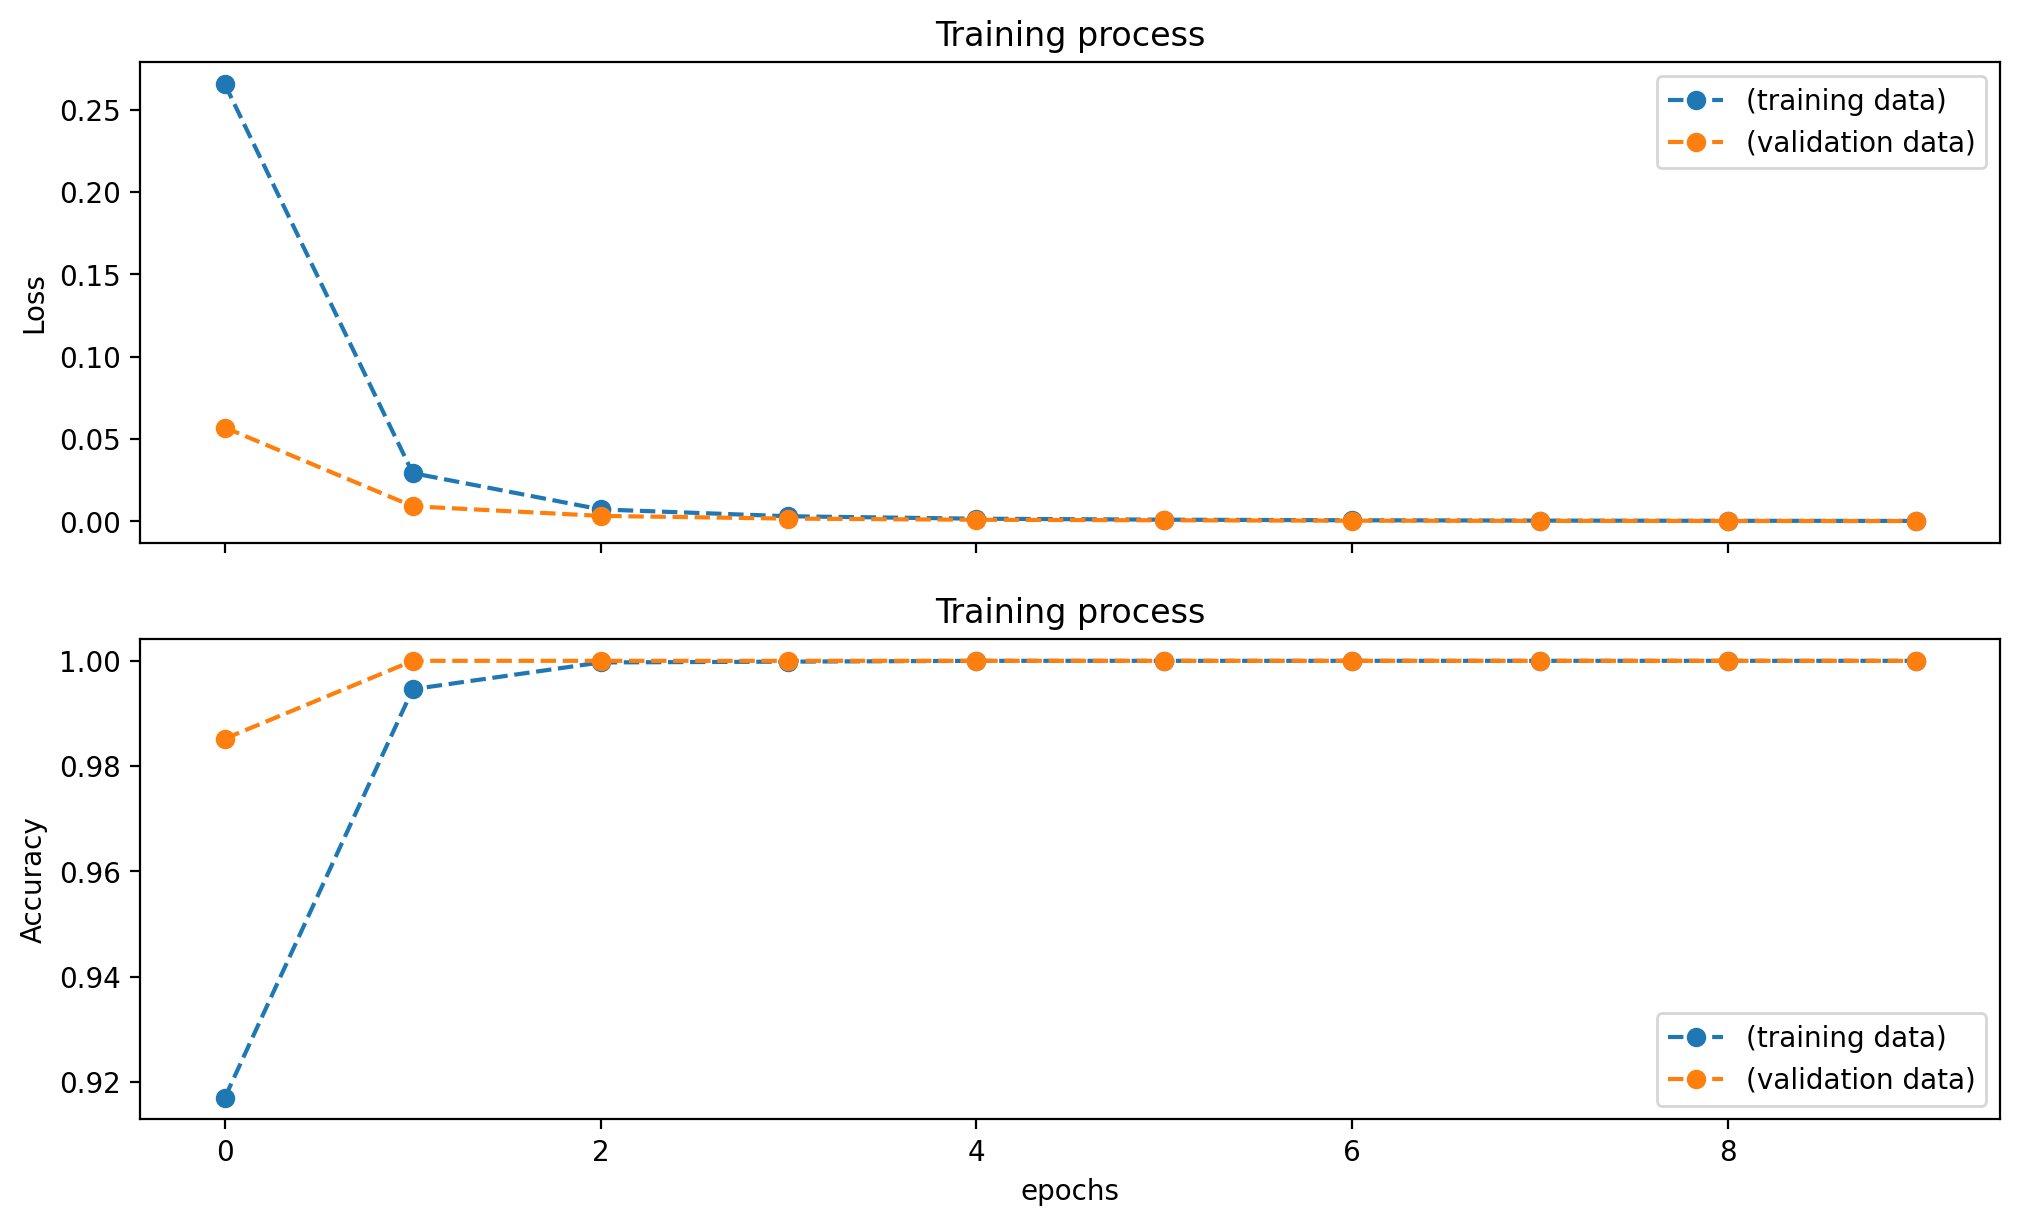

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,7), dpi=200)

ax1.plot(history.history['loss'], "o--", label='(training data)')
ax1.plot(history.history['val_loss'], "o--", label='(validation data)')
ax1.set_title('Training process')
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(history.history['accuracy'], "o--", label='(training data)')
ax2.plot(history.history['val_accuracy'], "o--", label='(validation data)')
ax2.set_title('Training process')
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("epochs")
ax2.legend()

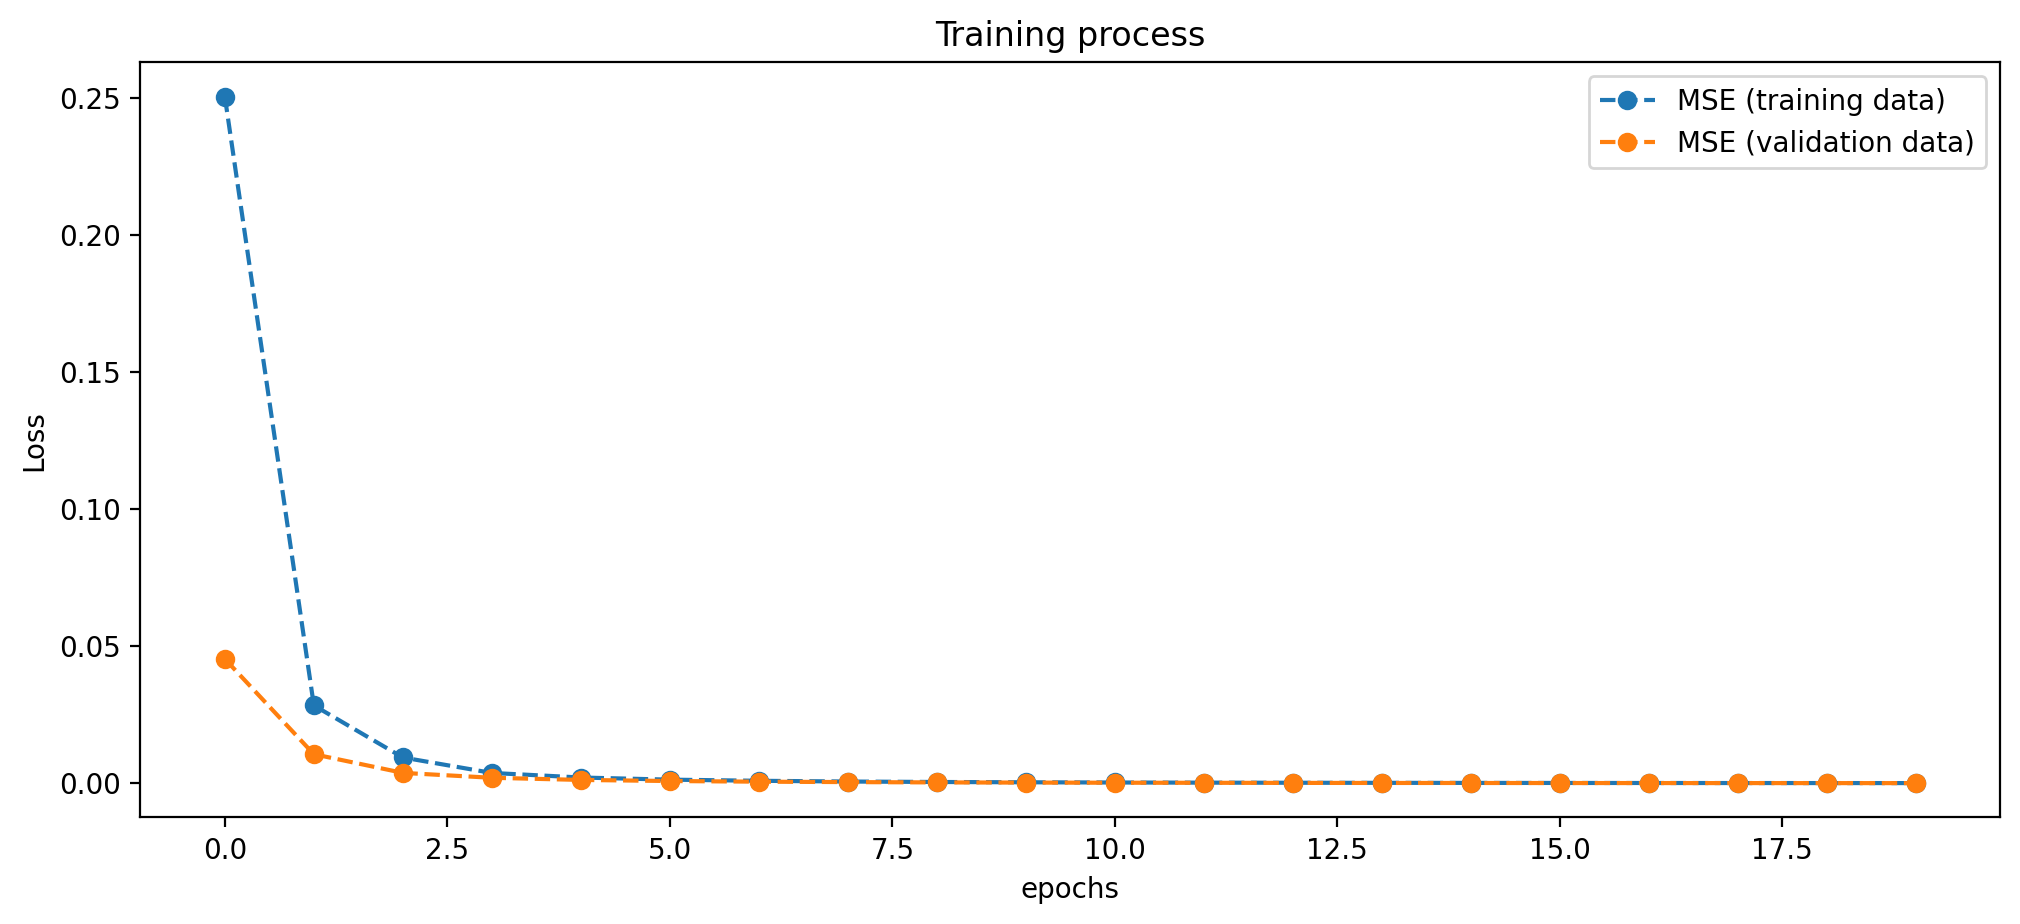

In [24]:
plt.figure(figsize=(12,5), dpi=200)
plt.plot(history.history['loss'], "o--", label='MSE (training data)')
plt.plot(history.history['val_loss'], "o--", label='MSE (validation data)')
plt.title('Training process')
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()